# Visualisation of proteomics expression using histograms

In [51]:
import pandas as pd
import pickle

# import GDSC2 drug response data using pickle

with open('data/drug-response/GDSC2/cache_gdsc2.pkl', 'rb') as f:
    gdsc2 = pickle.load(f)
    gdsc2_info = pickle.load(f)

# import CCLE gene expression data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

# import CCLE sample info data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)

# import proteomic expression
with open('data/proteomic-expression/goncalves-2022-cell/goncalve_proteome_processed.pkl', 'rb') as f:
    joined_full_protein_matrix = pickle.load(f)
    joined_sin_peptile_exclusion_matrix = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)

# open STRING to goncalves mapping file

with open('data\protein-interaction\STRING\goncalve_to_string_id_df.pkl', 'rb') as f:
    goncalve_to_string_id_df = pickle.load(f)


In [52]:
# create feature and target 

import DataFunctions as utils

drug_selected = 'Palbociclib'

# create the full dataset

palbociclib_proteomic_df = utils.create_joint_dataset_from_proteome_gdsc(drug_selected, joined_sin_peptile_exclusion_matrix, gdsc2)

feature_data, label_data = utils.create_feature_and_label(palbociclib_proteomic_df)



In [53]:
palbociclib_proteomic_df.head(2)

,P37108;SRP14_HUMAN,Q96JP5;ZFP91_HUMAN,Q9Y4H2;IRS2_HUMAN,P36578;RL4_HUMAN,Q6SPF0;SAMD1_HUMAN,O76031;CLPX_HUMAN,Q8WUQ7;CATIN_HUMAN,A6NIH7;U119B_HUMAN,Q9BTD8;RBM42_HUMAN,Q9P258;RCC2_HUMAN,...,Q5EBL4;RIPL1_HUMAN,P49715;CEBPA_HUMAN,Q5TA45;INT11_HUMAN,O14924;RGS12_HUMAN,Q7Z3B1;NEGR1_HUMAN,O60669;MOT2_HUMAN,Q13571;LAPM5_HUMAN,Q96JM2;ZN462_HUMAN,P35558;PCKGC_HUMAN,LN_IC50
SIDM00042,5.70786,NaN,NaN,6.22574,NaN,4.49579,NaN,NaN,2.87981,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.344381
SIDM00044,6.04591,3.69356,NaN,7.07092,3.49594,4.05438,NaN,NaN,3.44202,4.34237,...,3.0226,NaN,NaN,NaN,NaN,2.16952,NaN,NaN,NaN,2.482390


## Distribution of protein expression 

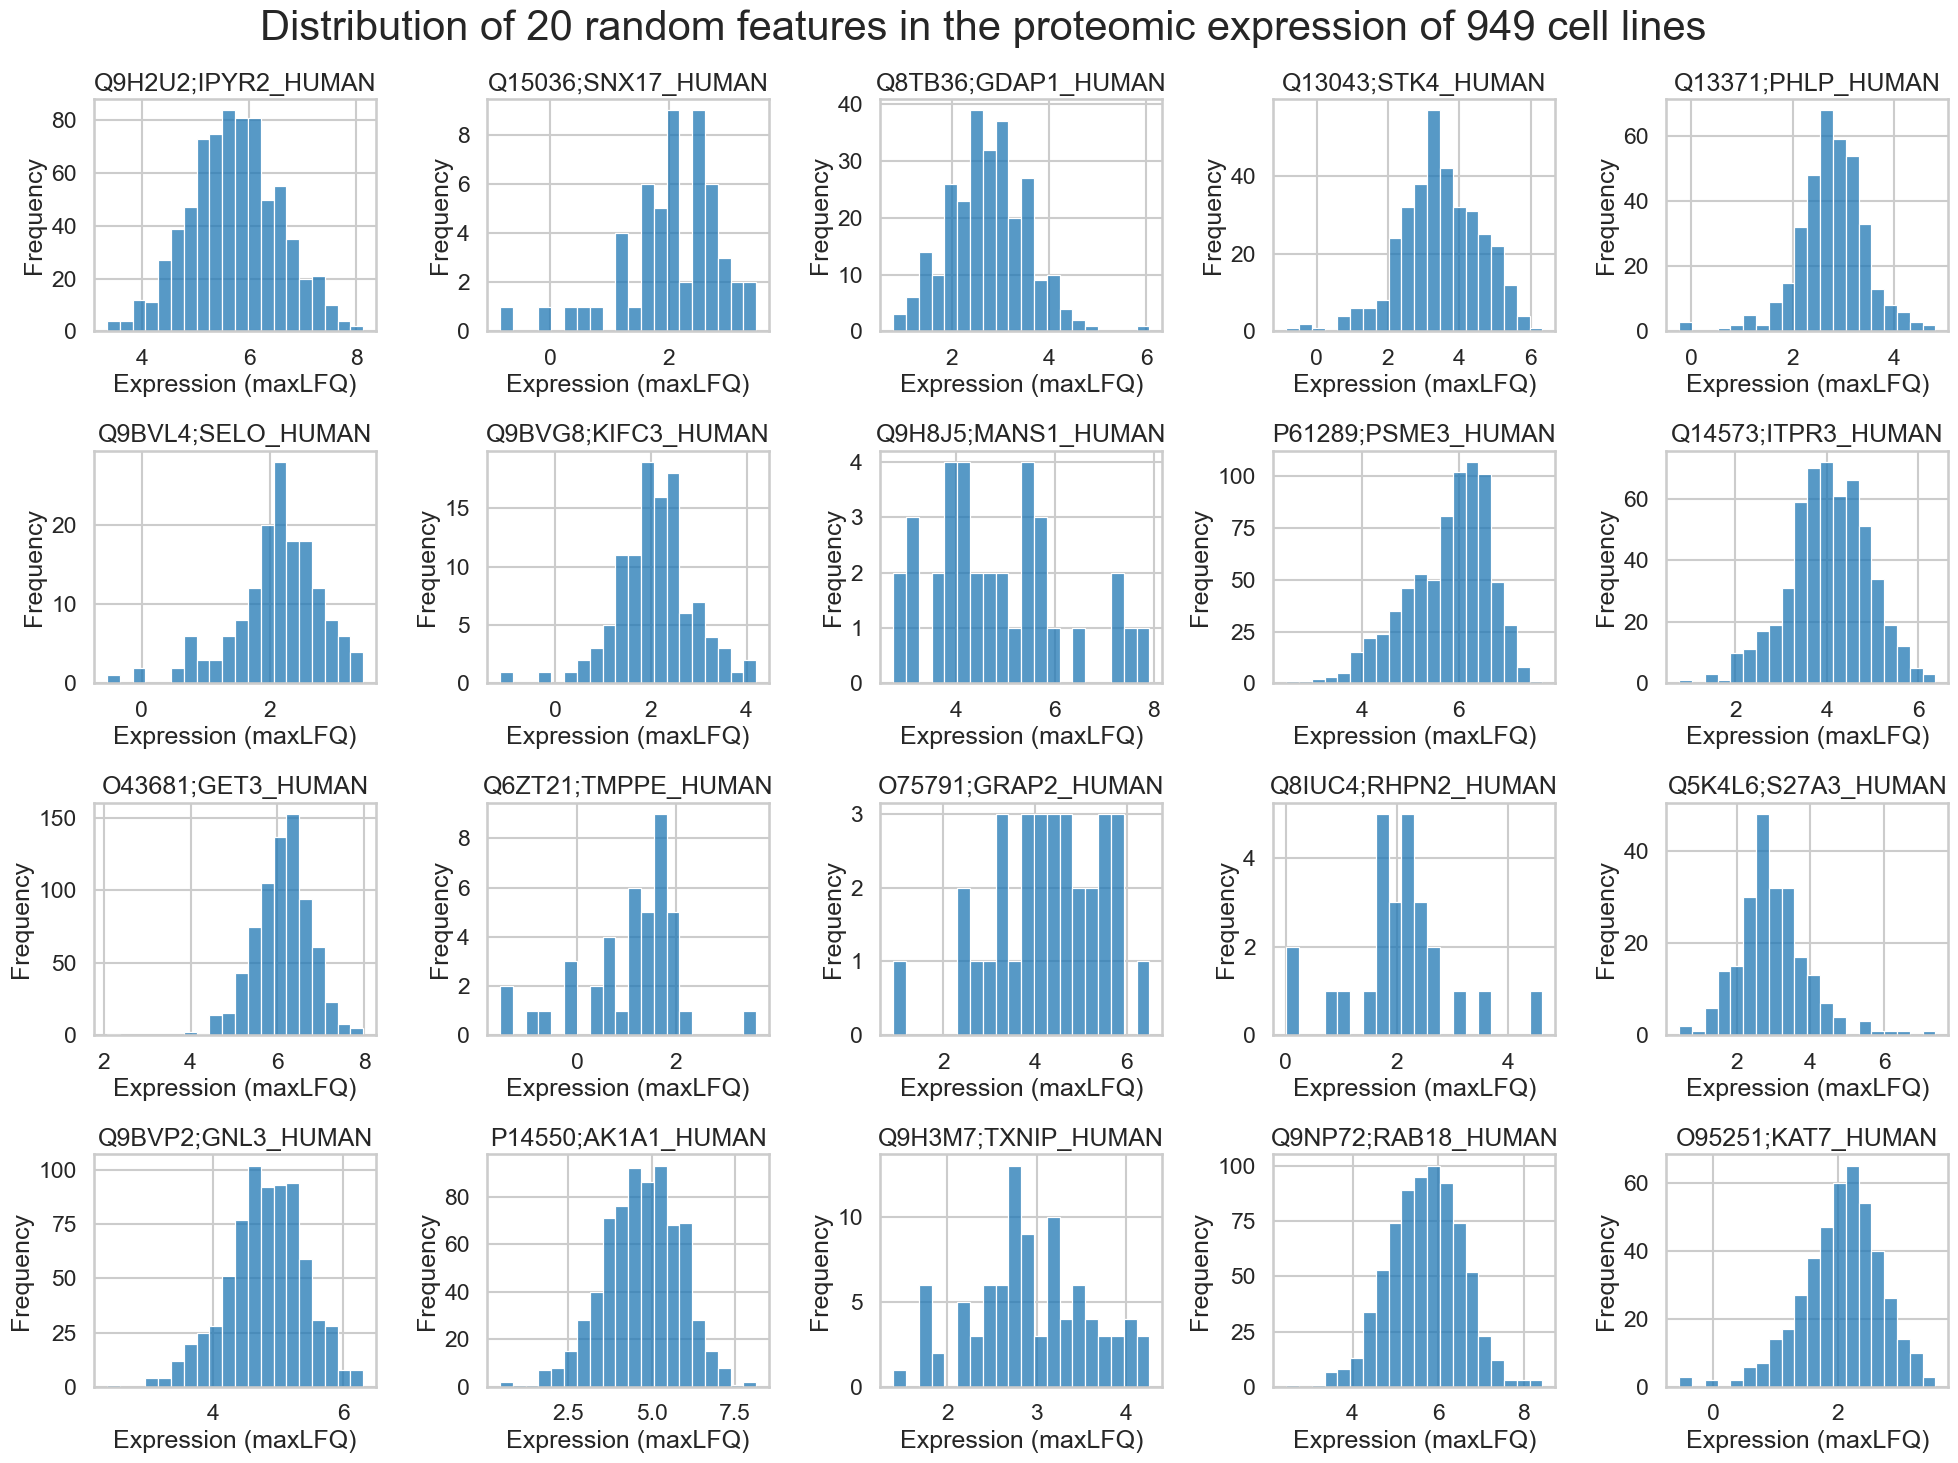

In [54]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

# select a random set of 20 features

import numpy as np

np.random.seed(16)

random_features = np.random.choice(feature_data.columns, 20, replace=False)

# plot the features as 20 histograms in a 4x5 grid


fig, axes = plt.subplots(4, 5, figsize=(20, 15))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(feature_data[random_features[i]], bins=20, ax=ax)
    ax.set_title(random_features[i])
    ax.set_xlabel('Expression (maxLFQ)')
    ax.set_ylabel('Frequency')

# set a title for the whole plot
fig.suptitle('Distribution of 20 random features in the proteomic expression of 949 cell lines', fontsize=30)
fig.tight_layout()
plt.show()


In [55]:
# for each feature in the dataset, plot the distribution of the feature as a histogram and save the plot

run_code = False
save_path = 'data//results//visualising_omics_dataset//all_distributions_goncalves'

if run_code:
    for feature in feature_data.columns:
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.histplot(feature_data[feature], bins=20, ax=ax)
        ax.set_title(feature)
        ax.set_xlabel('Expression (maxLFQ)')
        ax.set_ylabel('Frequency')
        fig.tight_layout()
        fig.savefig(f'{save_path}//{feature}.png')
        plt.close(fig)
        

In [57]:
# # using the same random features, plot the correlation between each feature and the target

# fig, axes = plt.subplots(4, 5, figsize=(20, 15))

# for i, ax in enumerate(axes.flatten()):
#     col = random_features[i]
#     X = palbociclib_proteomic_df[col]
#     Y = palbociclib_proteomic_df['LN_IC50']
#     ax.scatter(X, Y, color='purple', alpha=0.5, s=10)
#     m, b = np.polyfit(X, Y, 1)
#     ax.plot(X, m*X + b, color='grey')
#     corr = str(round(np.corrcoef(X, Y)[0, 1], 2))

#     # insert annotations
#     ax.text(0.05, 0.95, f'r={corr}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
#     ax.set_title(f'{col}')
#     ax.set_xlabel('Expression')
#     ax.set_ylabel('Palbociclib (LN_IC50)')

# plt.tight_layout()
# plt.show()

## Missing data imputation

In [58]:
# given the feature data, remove the features with too many missing values, remove if more than 50% of the data is missing

missing_50_feature_data = feature_data.dropna(axis=1, thresh=feature_data.shape[0]*0.5)
new_shape = missing_50_feature_data.shape
print(f'Number of features with less than 50% missing values: {new_shape[1]}')

Number of features with less than 50% missing values: 3387


In [59]:
missing_50_feature_data.head(2)

,P37108;SRP14_HUMAN,Q96JP5;ZFP91_HUMAN,P36578;RL4_HUMAN,Q6SPF0;SAMD1_HUMAN,O76031;CLPX_HUMAN,Q9BTD8;RBM42_HUMAN,Q9P258;RCC2_HUMAN,Q8TCS8;PNPT1_HUMAN,Q96L91;EP400_HUMAN,P52701;MSH6_HUMAN,...,Q9NX14;NDUBB_HUMAN,Q4VXU2;PAP1L_HUMAN,P09651;ROA1_HUMAN,P01111;RASN_HUMAN,P12074;CX6A1_HUMAN,Q99618;CDCA3_HUMAN,Q8WY22;BRI3B_HUMAN,Q5HYI8;RABL3_HUMAN,Q8N131;PORIM_HUMAN,Q86SE5;RALYL_HUMAN
SIDM00042,5.70786,NaN,6.22574,NaN,4.49579,2.87981,NaN,6.29238,NaN,1.77513,...,NaN,NaN,7.81023,2.91382,3.88576,NaN,4.25578,NaN,6.02448,7.48070
SIDM00044,6.04591,3.69356,7.07092,3.49594,4.05438,3.44202,4.34237,5.30910,1.95234,4.48704,...,NaN,NaN,9.24680,4.48527,0.54312,NaN,NaN,4.36879,5.41931,6.55969


In [63]:
# for the remaining nan values, 
# replace with the value between 0 to 25th percentile of the feature 
# under the assumption that the missing values are lowly expressed

q = missing_50_feature_data.quantile(0.25)

for col in missing_50_feature_data.columns:
    print(f'filling between 0 to {q[col]} for {col}')
    value = np.random.uniform(0, q[col], size=missing_50_feature_data[col].shape[0])
    # convert value to pandas series
    value = pd.Series(value, index=missing_50_feature_data[col].index)
    # fillna 
    missing_50_feature_data[col].fillna(value, inplace=True)
    # for each nan value, replace with the random value
    # for i, v in enumerate(missing_50_feature_data[col].isna()):
    #     if v:
    #         missing_50_feature_data[col][i] = value[i]
    #         print(f'filling {value[i]} for {col} at index {i}')



filling between 0 to 6.08135 for P37108;SRP14_HUMAN
filling between 0 to 2.33722 for Q96JP5;ZFP91_HUMAN
filling between 0 to 6.99447 for P36578;RL4_HUMAN
filling between 0 to 2.31054 for Q6SPF0;SAMD1_HUMAN
filling between 0 to 4.28715 for O76031;CLPX_HUMAN
filling between 0 to 2.92665 for Q9BTD8;RBM42_HUMAN
filling between 0 to 4.31451 for Q9P258;RCC2_HUMAN
filling between 0 to 5.31153 for Q8TCS8;PNPT1_HUMAN
filling between 0 to 1.1265779287399524 for Q96L91;EP400_HUMAN
filling between 0 to 3.3987 for P52701;MSH6_HUMAN
filling between 0 to 4.73003 for P55036;PSMD4_HUMAN
filling between 0 to 2.61884 for Q8WWH5;TRUB1_HUMAN
filling between 0 to 1.32961 for Q96D53;COQ8B_HUMAN
filling between 0 to 3.89903 for Q6P2E9;EDC4_HUMAN
filling between 0 to 2.25949 for Q9UNF1;MAGD2_HUMAN
filling between 0 to 2.9188 for Q9NQP4;PFD4_HUMAN
filling between 0 to 1.1387784341061387 for O15357;SHIP2_HUMAN
filling between 0 to 6.32403 for O15042;SR140_HUMAN
filling between 0 to 3.68133 for Q01780;EXOSX_HUMAN

C:\Users\l8105\AppData\Local\Temp\ipykernel_13880\3942035258.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_50_feature_data[col].fillna(value, inplace=True)


filling between 0 to 4.23249 for O75152;ZC11A_HUMAN
filling between 0 to 2.7867 for Q96F86;EDC3_HUMAN
filling between 0 to 3.56676 for P11766;ADHX_HUMAN
filling between 0 to 5.94631 for P13804;ETFA_HUMAN
filling between 0 to 2.4271402440349754 for Q92599;SEPT8_HUMAN
filling between 0 to 7.52814 for P36957;ODO2_HUMAN
filling between 0 to 2.6000301288876027 for Q5VTR2;BRE1A_HUMAN
filling between 0 to 10.43421 for P10809;CH60_HUMAN
filling between 0 to 2.33033 for Q15814;TBCC_HUMAN
filling between 0 to 4.46163 for Q99460;PSMD1_HUMAN
filling between 0 to 3.4069 for A1L0T0;HACL2_HUMAN
filling between 0 to 5.65776 for Q01844;EWS_HUMAN
filling between 0 to 4.81717 for P46013;KI67_HUMAN
filling between 0 to 3.76461 for Q29RF7;PDS5A_HUMAN
filling between 0 to 6.96486 for Q86V81;THOC4_HUMAN
filling between 0 to 6.65268 for Q9NR30;DDX21_HUMAN
filling between 0 to 9.33789 for P40926;MDHM_HUMAN
filling between 0 to 2.8595 for Q13206;DDX10_HUMAN
filling between 0 to 7.04102 for Q9UKM9;RALY_HUMAN
fil

In [64]:
test = missing_50_feature_data['O15231;ZN185_HUMAN']

test

SIDM00042    2.444110
SIDM00044    0.618225
SIDM00045    2.129890
SIDM00047    1.174592
SIDM00049    1.922670
               ...   
SIDM01247    1.915759
SIDM01248    3.551250
SIDM01251    2.419626
SIDM01259    1.352004
SIDM01265    1.244082
Name: O15231;ZN185_HUMAN, Length: 737, dtype: float64

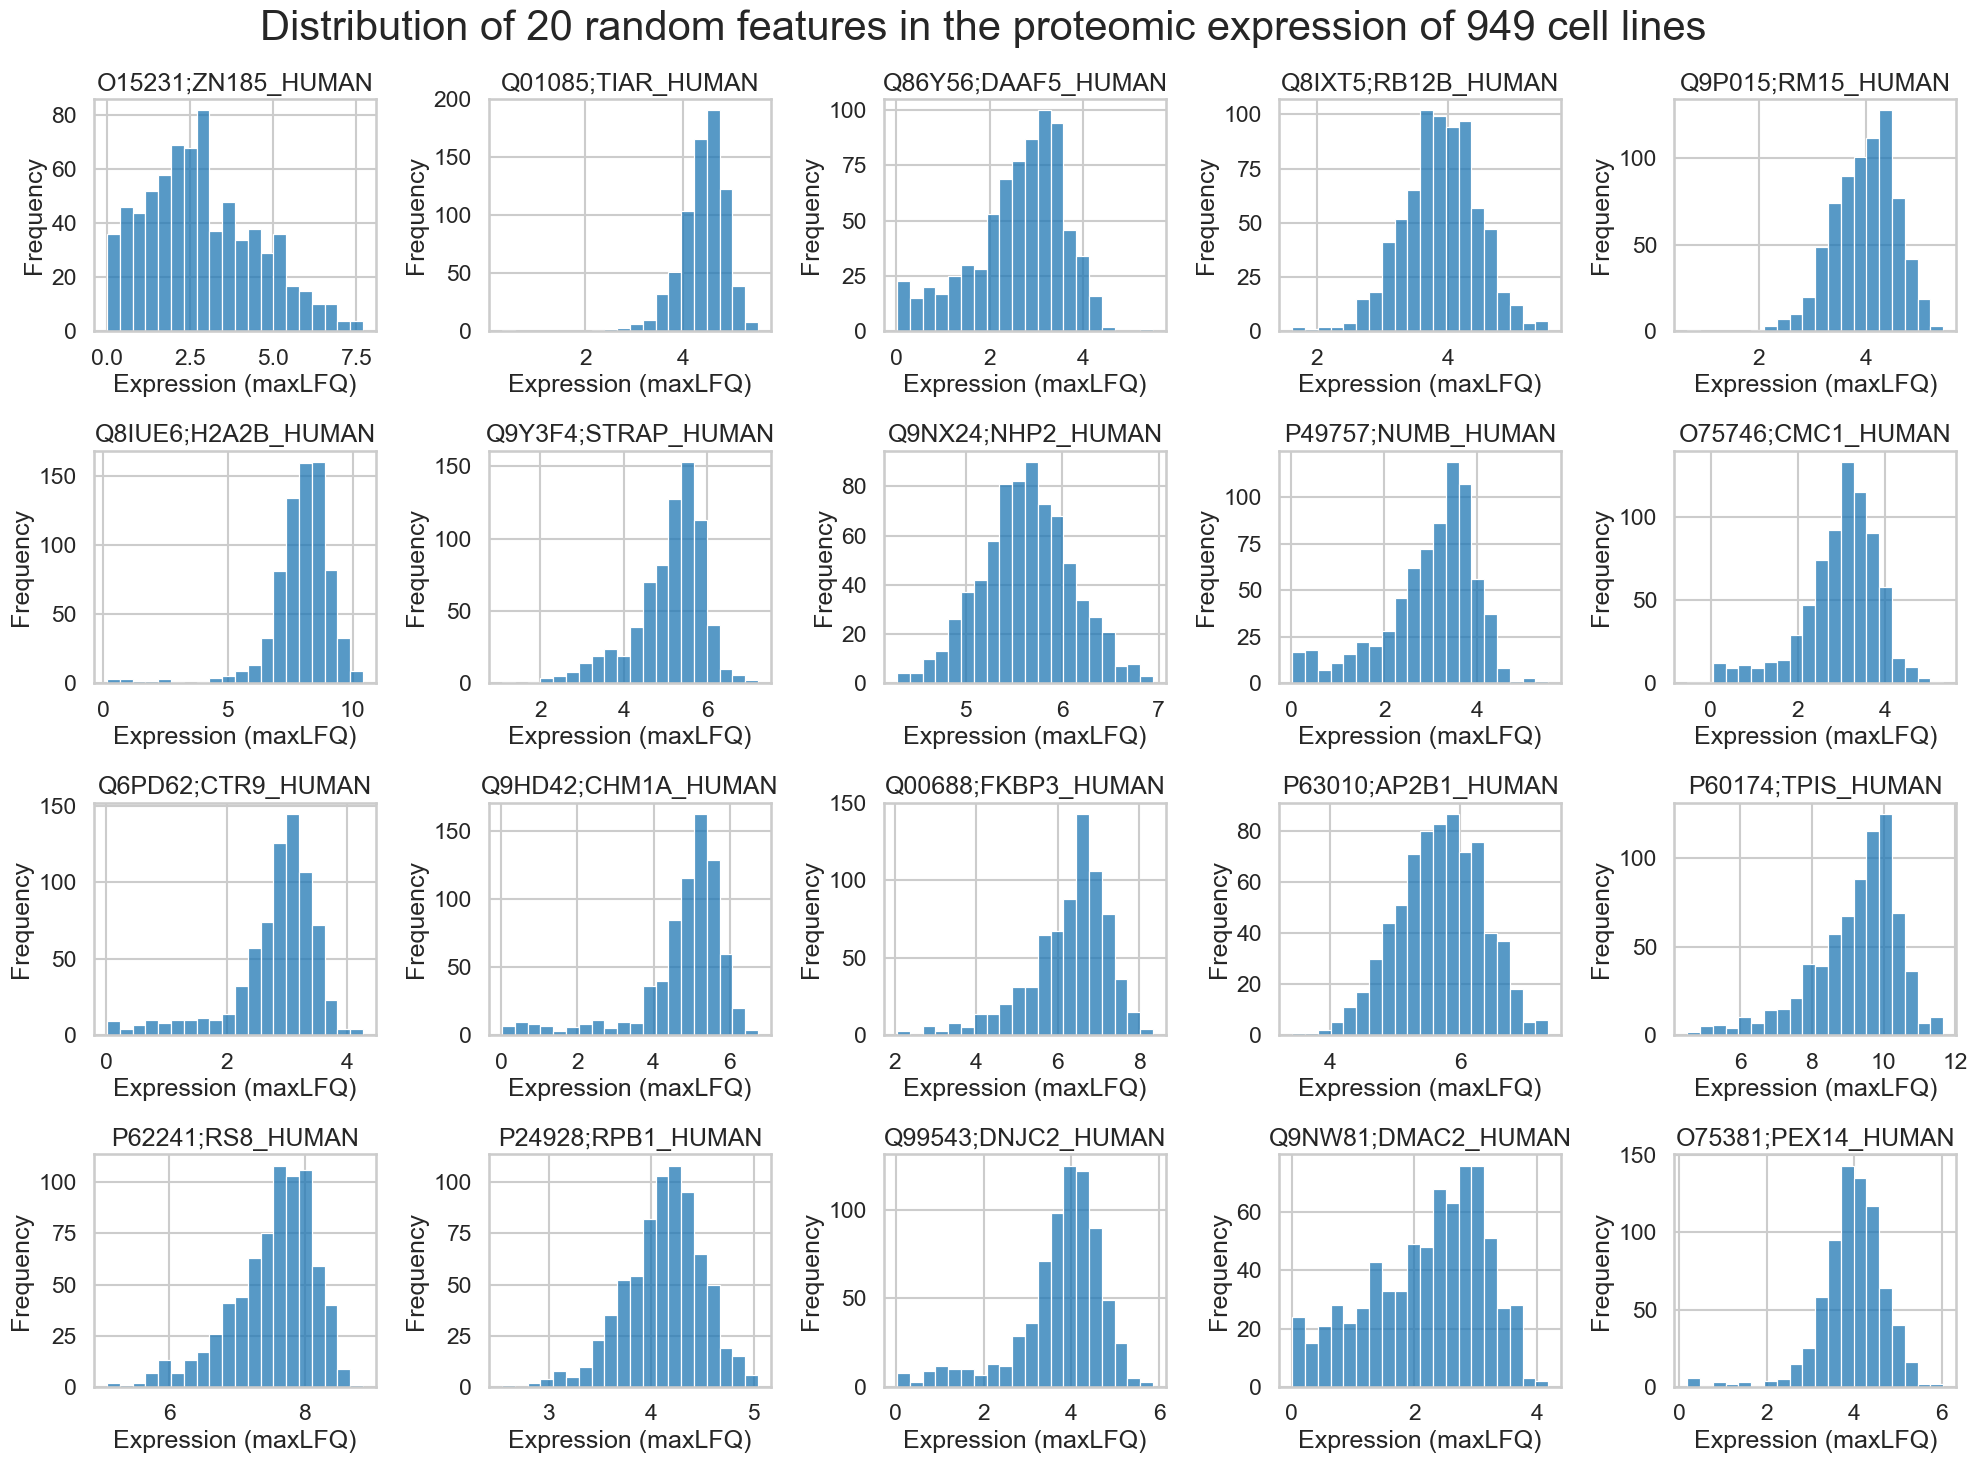

In [65]:

# plot the distribution of the features with less than 50% missing values

# get a random set of 20 features

np.random.seed(16)

m50_random_features = np.random.choice(missing_50_feature_data.columns, 20, replace=False)

fig, axes = plt.subplots(4, 5, figsize=(20, 15))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(missing_50_feature_data[m50_random_features[i]], bins=20, ax=ax)
    ax.set_title(m50_random_features[i])
    ax.set_xlabel('Expression (maxLFQ)')
    ax.set_ylabel('Frequency')

# set a title for the whole plot
fig.suptitle('Distribution of 20 random features in the proteomic expression of 949 cell lines (post missing values removal)', fontsize=30)
fig.tight_layout()
plt.show()
